
# Detección de fraude con Gradient Boosting (GB) y XGBoost (XGB)

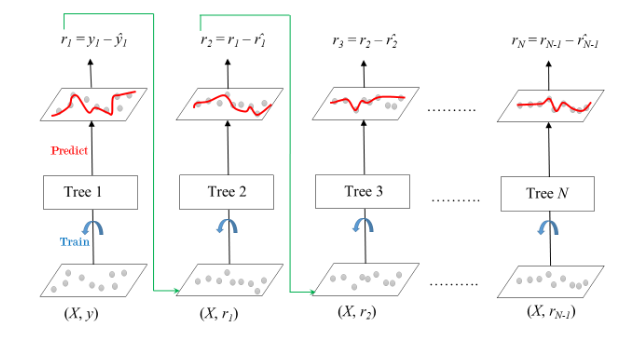


## Cargar datos

https://www.kaggle.com/datasets/mian91218/insurance-claims



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("insurance_claims.csv")
df


months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-01-05           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

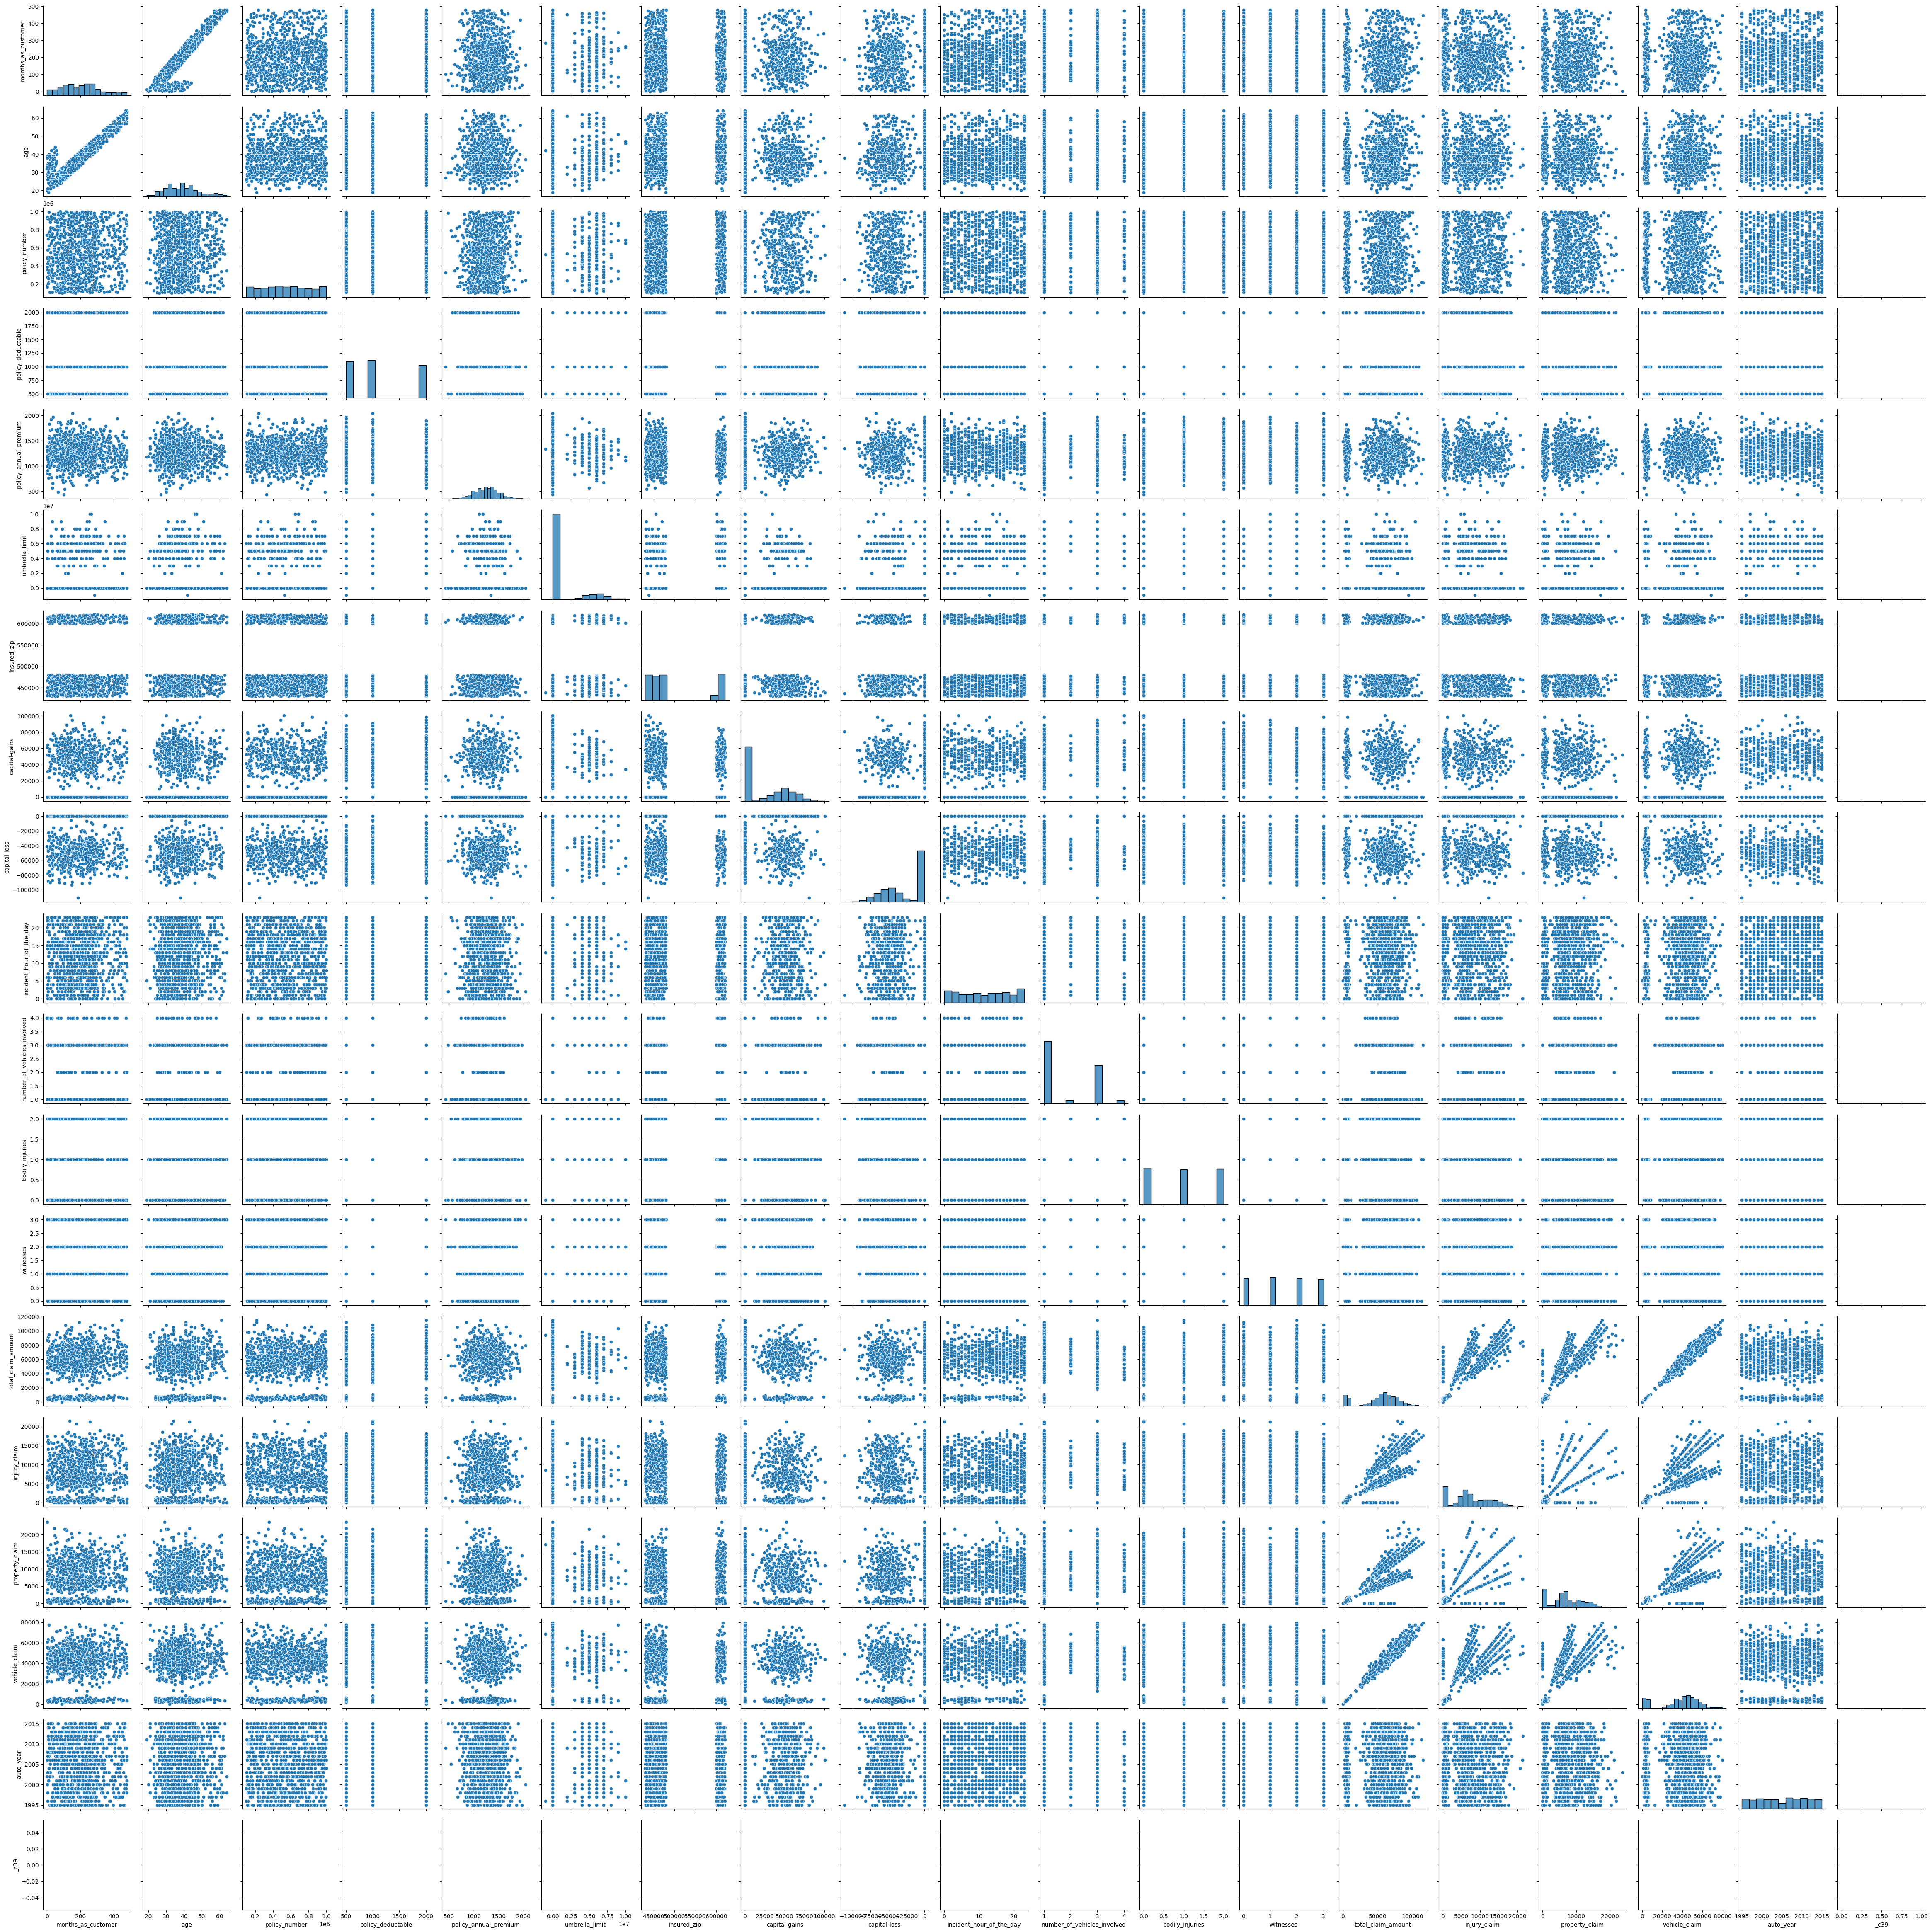

In [6]:
sns.pairplot(df)


## EDA breve
Miramos estructura, distribución del objetivo y faltantes.


In [9]:
df.isna().sum().sort_values(ascending=False).head(5)



_c39                     1000
authorities_contacted      91
months_as_customer          0
age                         0
policy_state                0
dtype: int64

In [10]:
df.select_dtypes(include="number").describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
_c39                            0.0           NaN           NaN         NaN   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_number                335980.2500  533135.0  759099.750    999435.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00  
_c39                                 NaN       NaN         NaN          NaN

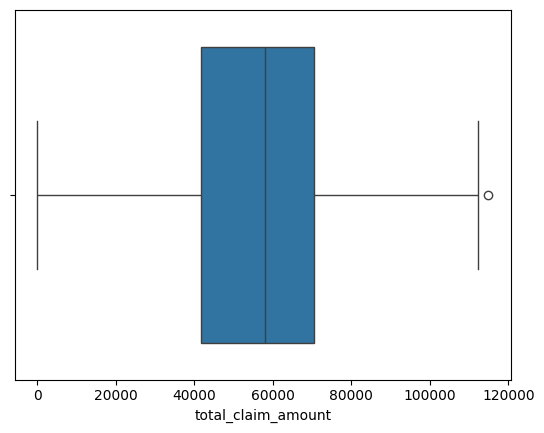

In [11]:
sns.boxplot(x=df["total_claim_amount"])
plt.show()

<Axes: xlabel='vehicle_claim', ylabel='Count'>

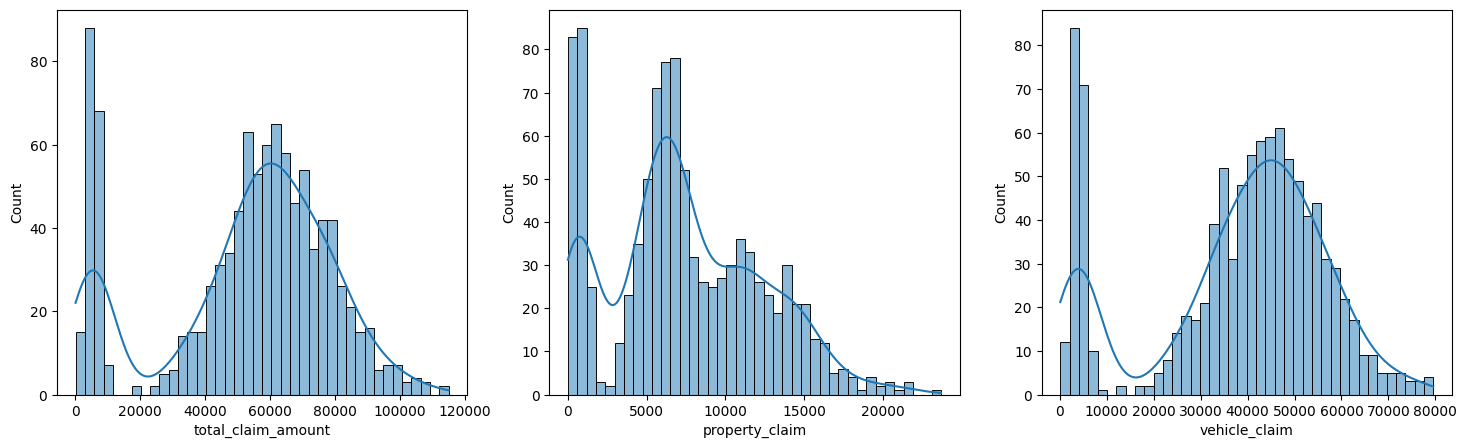

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(df["total_claim_amount"], bins=40, kde=True, ax=axes[0])
sns.histplot(df["property_claim"], bins=40, kde=True, ax=axes[1])
sns.histplot(df["vehicle_claim"], bins=40, kde=True, ax=axes[2])


## Preparación mínima
- `fraud_reported`: Y/N -> 1/0.
- Imputación simple: mediana (numéricas) y moda (categóricas).
- One-hot encoding (drop_first=True).


In [15]:
import pandas as pd
from sklearn.impute import SimpleImputer

work = df.copy()

y = work["fraud_reported"].map({"Y":1, "N":0})


In [17]:
X= work.drop(columns="fraud_reported")

In [20]:
num_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(exclude="number").columns

In [22]:
cat_cols

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

In [23]:
X[num_cols] = X[num_cols].fillna(X[num_cols].median())
X[cat_cols] = X[cat_cols].fillna(X[cat_cols].mode().iloc[0])

In [25]:
X = pd.get_dummies(X, drop_first=True)
X = X.fillna(0)


## División entrenamiento/prueba (estratificada)


In [26]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.mean().round(3)


((750, 2154), (250, 2154), np.float64(0.247))

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Modelo (Random Forest)
rf = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, class_weight="balanced")

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.75      0.99      0.86       188
           1       0.00      0.00      0.00        62

    accuracy                           0.75       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.56      0.75      0.64       250



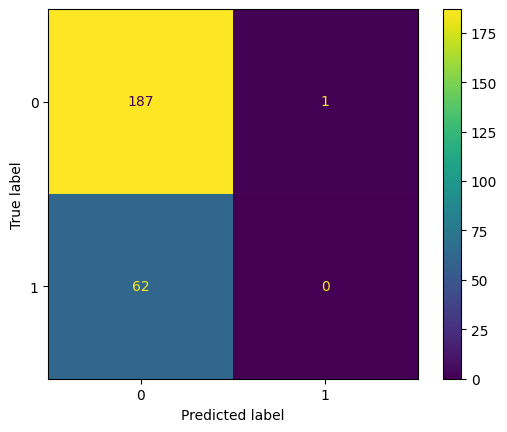

In [28]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


## Gradient Boosting (GB)
- Árboles pequeños en secuencia, corrigiendo errores del anterior.

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score


gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.08, max_depth=3, random_state=42)


In [30]:
gb

GradientBoostingClassifier(learning_rate=0.08, n_estimators=300,
                           random_state=42)

In [31]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.08, n_estimators=300,
                           random_state=42)

In [32]:
gb

GradientBoostingClassifier(learning_rate=0.08, n_estimators=300,
                           random_state=42)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       188
           1       0.62      0.48      0.55        62

    accuracy                           0.80       250
   macro avg       0.73      0.69      0.71       250
weighted avg       0.79      0.80      0.79       250



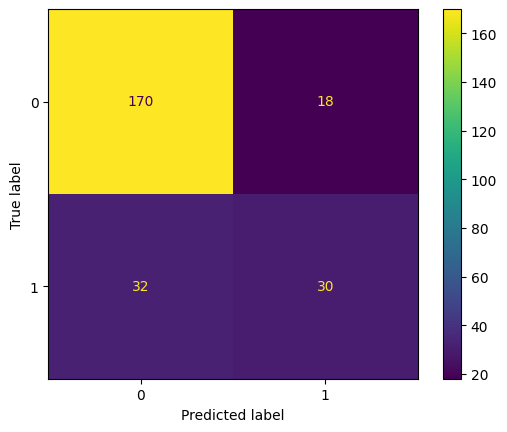

In [33]:
y_pred = gb.predict(X_test)
y_proba = gb.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


## XGBoost (XGB)
- Misma idea base (boosting), pero optimizada y regularizada (L1/L2).
- Subsampling de filas/columnas; manejo de faltantes; `scale_pos_weight` para desbalance.
- Esperamos mejorar ROC-AUC y/o Recall respecto a GB.


In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_base = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=4, subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1, tree_method="hist", objective="binary:logistic")

In [35]:
xgb_base

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=-1, num_parallel_tree=None, ...)

In [36]:
xgb_base.fit(X_train, y_train)
print(classification_report(y_test, xgb_base.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       188
           1       0.60      0.45      0.51        62

    accuracy                           0.79       250
   macro avg       0.71      0.68      0.69       250
weighted avg       0.77      0.79      0.78       250



In [37]:
spw = (y_train == 0).sum() / (y_train == 1).sum()
spw

np.float64(3.054054054054054)

In [38]:
xgb_w = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=4, subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1, tree_method="hist", objective="binary:logistic", scale_pos_weight=spw)

In [39]:
xgb_w

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=-1, num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       188
           1       0.64      0.63      0.63        62

    accuracy                           0.82       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.82      0.82      0.82       250



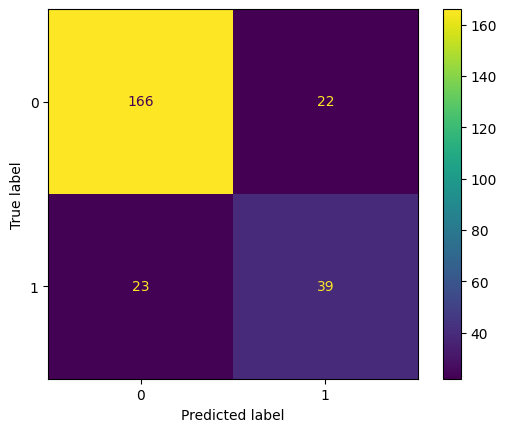

In [40]:
xgb_w.fit(X_train, y_train)
print(classification_report(y_test, xgb_w.predict(X_test)))
ConfusionMatrixDisplay.from_predictions(y_test, xgb_w.predict(X_test))
plt.show()


## Importancia de variables
Podemos ver qué variables ayudan más a separar fraude/no fraude.


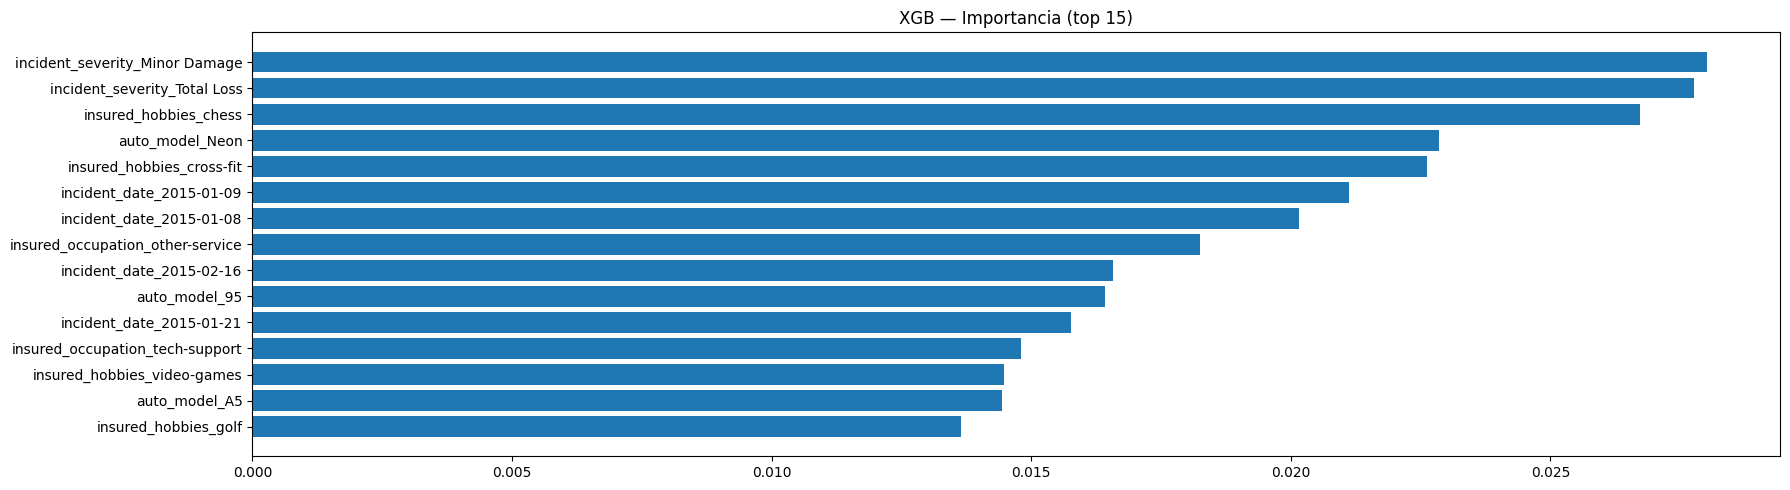

In [47]:
if 'xgb_w' in globals() and xgb_w is not None and hasattr(xgb_w, "feature_importances_"):
    imp_xgb = pd.Series(xgb_w.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
    fig = plt.figure(figsize=(18,5))
    plt.barh(imp_xgb.index[::-1], imp_xgb.values[::-1])
    plt.title("XGB — Importancia (top 15)")
    plt.tight_layout()
    plt.show()


Algunas conclusiones preliminares:
- **GB primero**: boosting secuencial, mejora respecto a modelos simples, buen punto de partida.
- **XGB después**: misma idea pero optimizada y regularizada, suele mejorar Recall.
- **Desbalance**: XGB permite ponderar la clase minoritaria con `scale_pos_weight`.